#Import Libraries and Load Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv(r"C:\Users\Akash shah\Downloads\Wellness_centredata.csv")
df.head()

,cityName,wellnessCentreName,card_type,count
0,AHMEDABAD,VEJALPUR,Serving,2177
1,AHMEDABAD,NAVRANGPURA,Pensioner,3891
2,AHMEDABAD,GANDHI NAGAR,Ex MP,19
3,AHMEDABAD,LALDARWAJA,Pensioner,1562
4,AHMEDABAD,"RAMBAUG,MANINGAR",Serving,3596


#Data Cleaning and Initial Checks

In [8]:
print("Dataset Info:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())

# Standardize string data
df['cityName'] = df['cityName'].str.strip().str.upper()
df['card_type'] = df['card_type'].str.strip().str.title()
df['wellnessCentreName'] = df['wellnessCentreName'].str.strip().str.title()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cityName            1284 non-null   object
 1   wellnessCentreName  1284 non-null   object
 2   card_type           1284 non-null   object
 3   count               1284 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 40.2+ KB
None

Missing Values:
 cityName              0
wellnessCentreName    0
card_type             0
count                 0
dtype: int64


#Descriptive Statistics

In [9]:
print("🔹 Descriptive Statistics:\n", df['count'].describe())

print("\n🔹 Unique Values:")
print("Cities:", df['cityName'].nunique())
print("Centres:", df['wellnessCentreName'].nunique())
print("Card Types:", df['card_type'].nunique())

🔹 Descriptive Statistics:
 count     1284.000000
mean      3616.672118
std       6507.888634
min          1.000000
25%          8.000000
50%        892.000000
75%       5221.750000
max      66423.000000
Name: count, dtype: float64

🔹 Unique Values:
Cities: 24
Centres: 363
Card Types: 7


# Data Visualization

#1. Histogram of Count

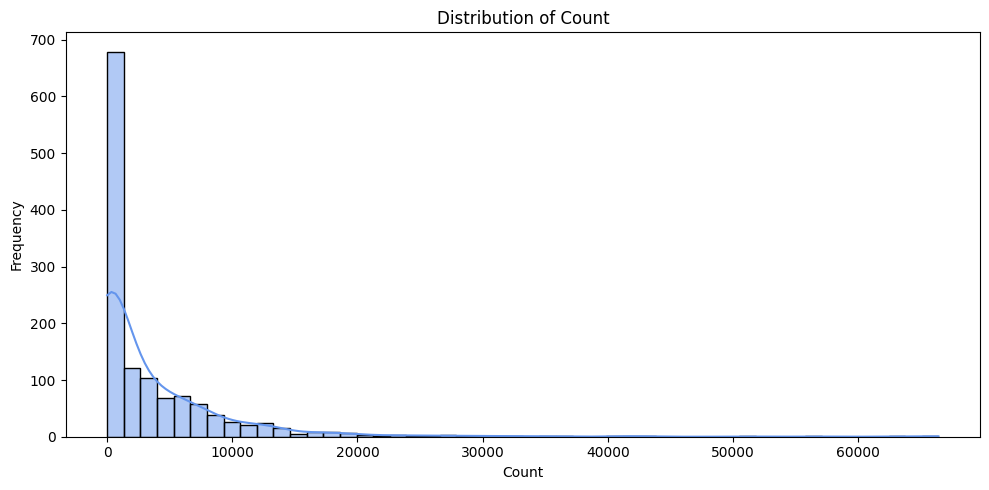

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df['count'], bins=50, kde=True, color='cornflowerblue')
plt.title("Distribution of Count")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#2. Boxplot for Outlier view

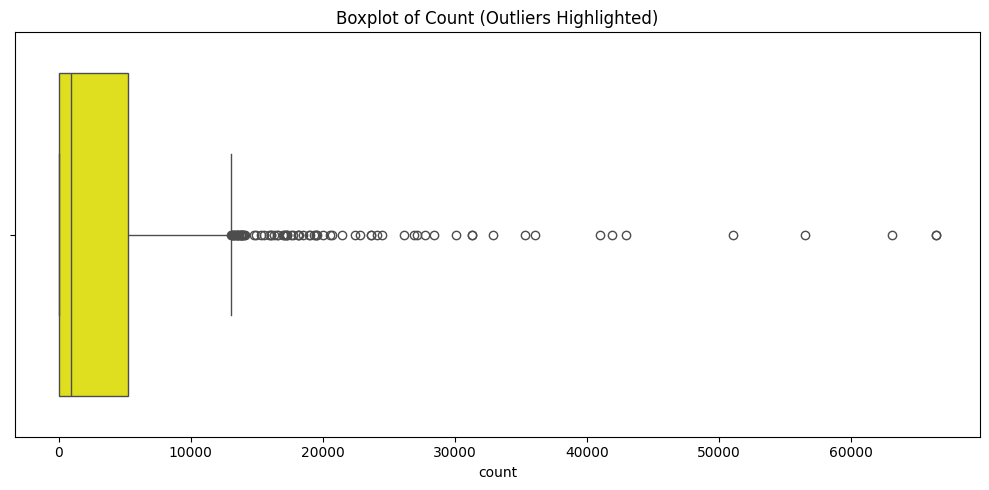

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='count', data=df, color='Yellow')
plt.title("Boxplot of Count (Outliers Highlighted)")
plt.tight_layout()
plt.show()

#3. Violin Plot - Card Type Distribution

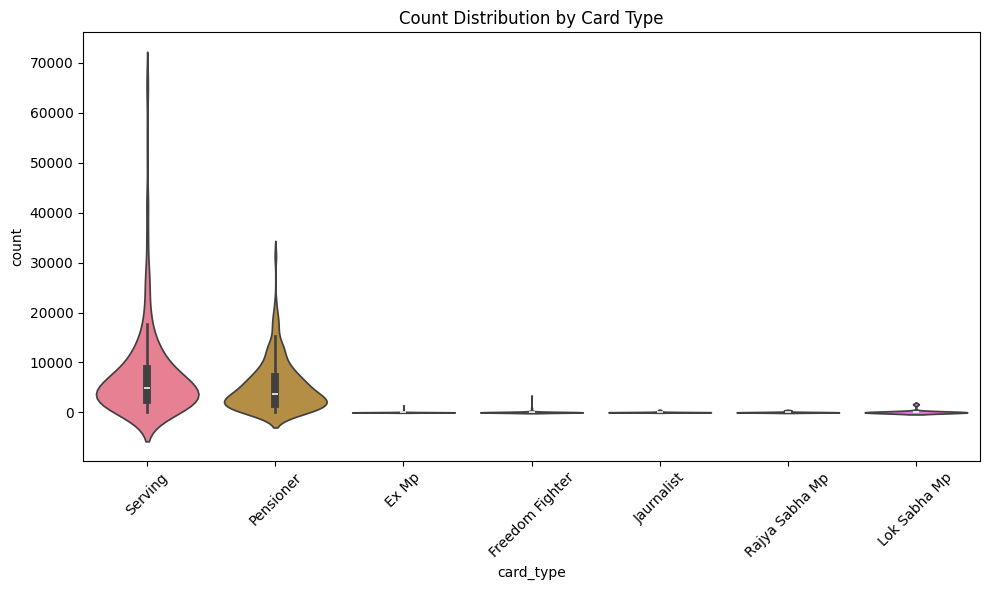

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='card_type', y='count', data=df, palette="husl")
plt.title("Count Distribution by Card Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#4. Total Count Per City

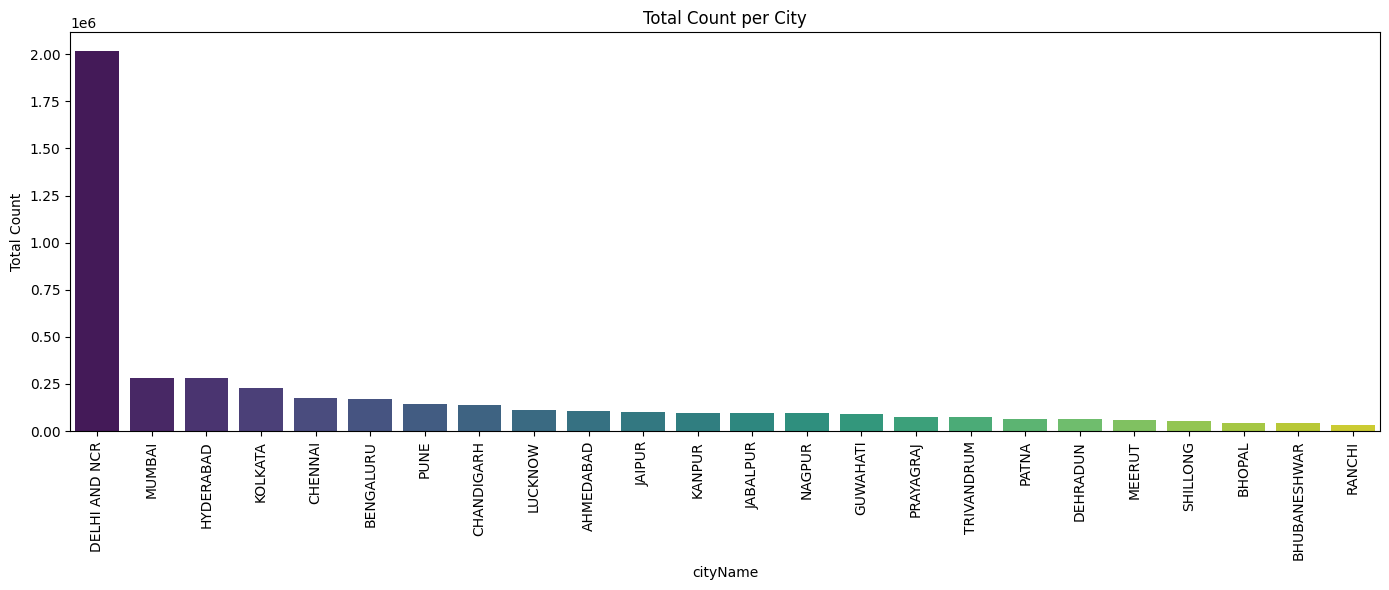

In [19]:
city_counts = df.groupby('cityName')['count'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title("Total Count per City")
plt.xticks(rotation=90)
plt.ylabel("Total Count")
plt.tight_layout()
plt.show()

#5. Top 10 Wellness Centres

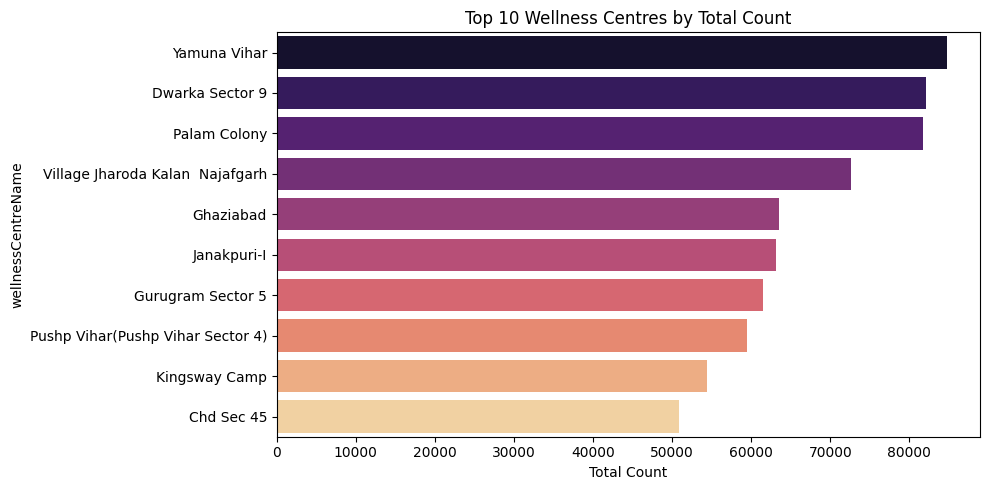

In [24]:
top_centres = df.groupby('wellnessCentreName')['count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(y=top_centres.index, x=top_centres.values, palette='magma')
plt.title("Top 10 Wellness Centres by Total Count")
plt.xlabel("Total Count")
plt.tight_layout()
plt.show()

#6. Heatmap - City Vs Card Type

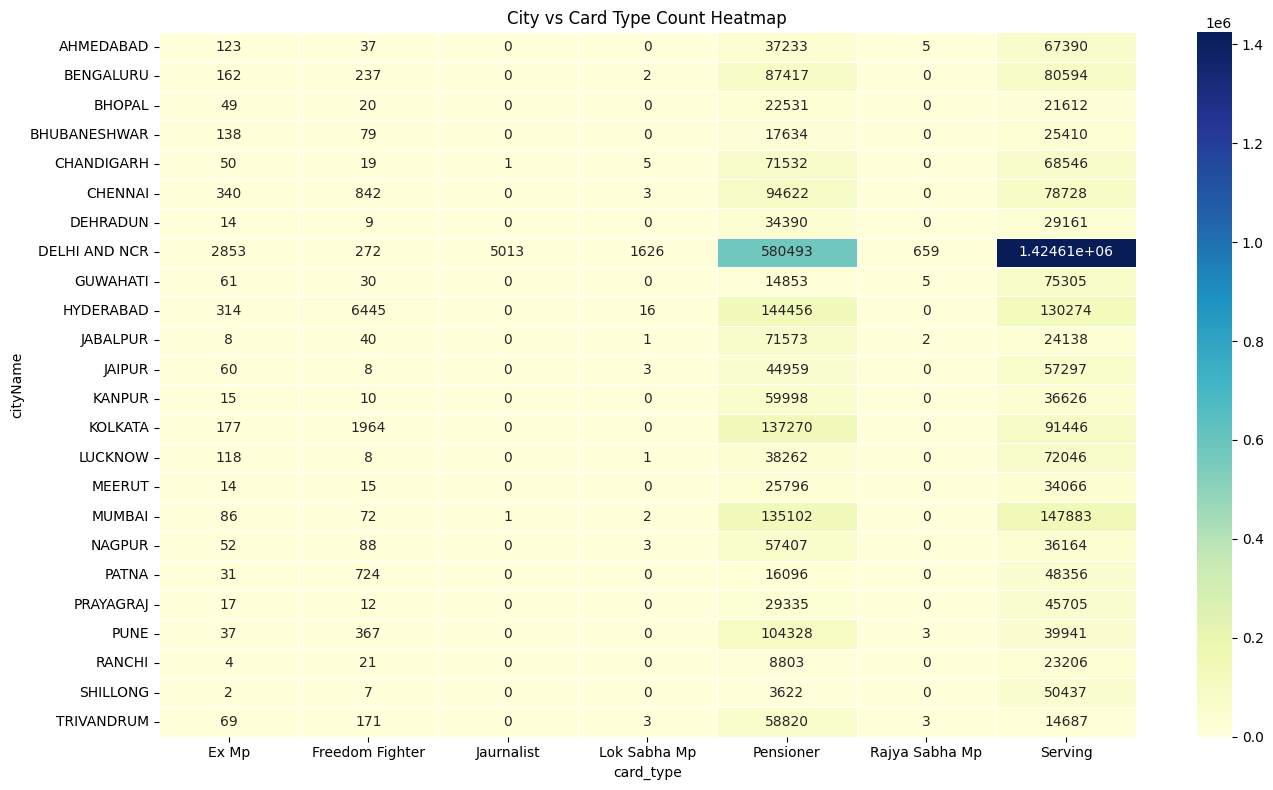

In [25]:
pivot_table = df.pivot_table(index='cityName', columns='card_type', values='count', aggfunc='sum', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5, annot=True, fmt="g")
plt.title("City vs Card Type Count Heatmap")
plt.tight_layout()
plt.show()

#7.A)Scatter Plot of Centres Vs Count

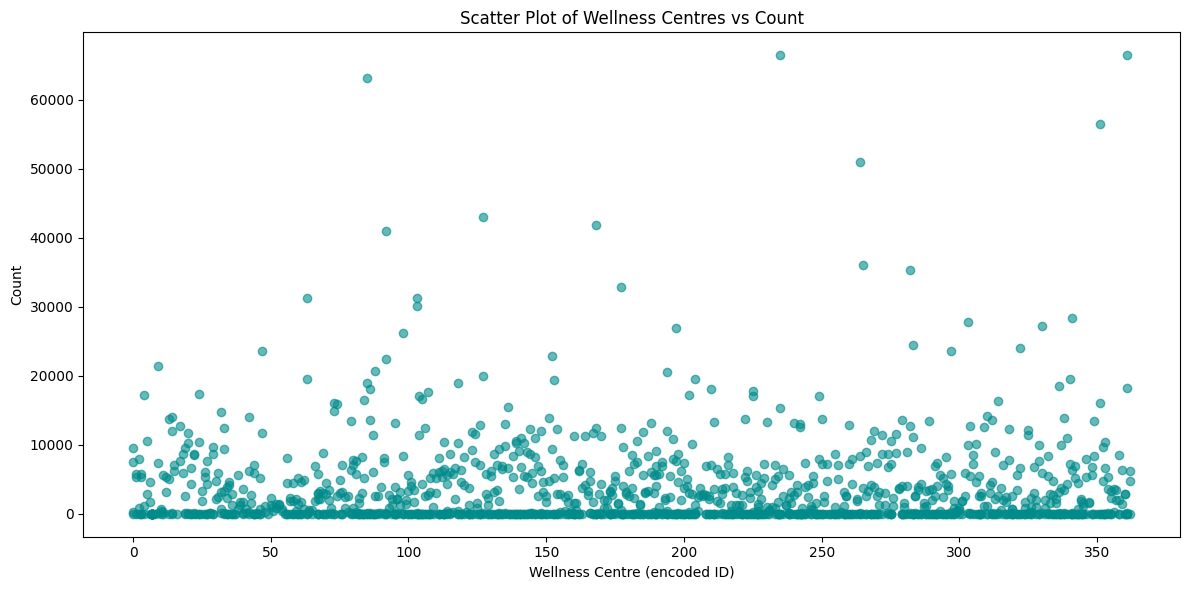

In [26]:
# Encode centre names to numerical values for plotting
df['centre_id'] = df['wellnessCentreName'].astype('category').cat.codes

plt.figure(figsize=(12, 6))
plt.scatter(df['centre_id'], df['count'], alpha=0.6, c='darkcyan')
plt.title("Scatter Plot of Wellness Centres vs Count")
plt.xlabel("Wellness Centre (encoded ID)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#7. B)Scatter Plot With Jitter: Count by Card Type

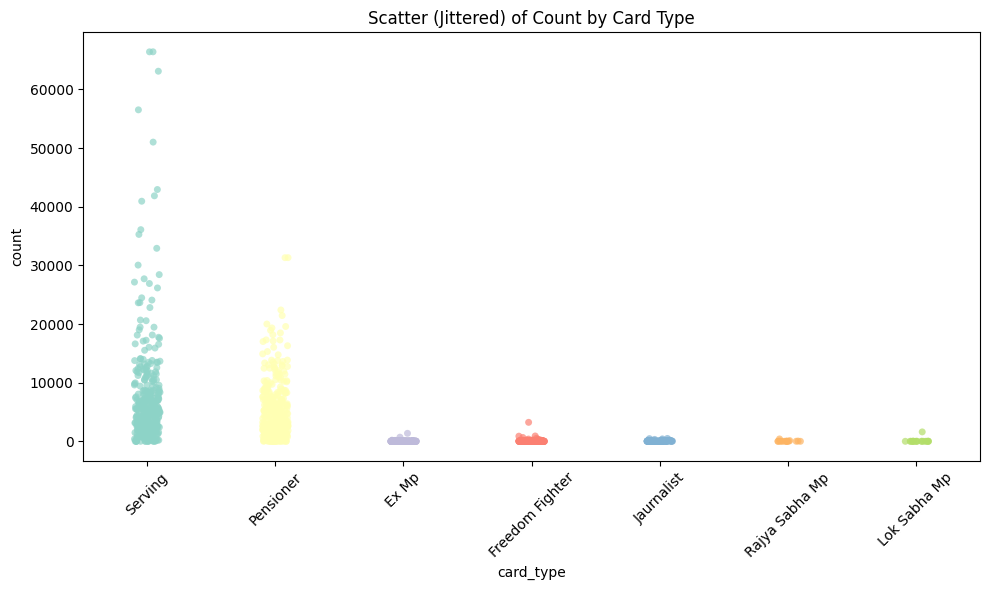

In [30]:
import random

plt.figure(figsize=(10, 6))
sns.stripplot(x='card_type', y='count', data=df, jitter=True, palette='Set3', alpha=0.7)
plt.title("Scatter (Jittered) of Count by Card Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#8. Pie Chart of Wellness Centre Distribution by City (Top 6 Cities)

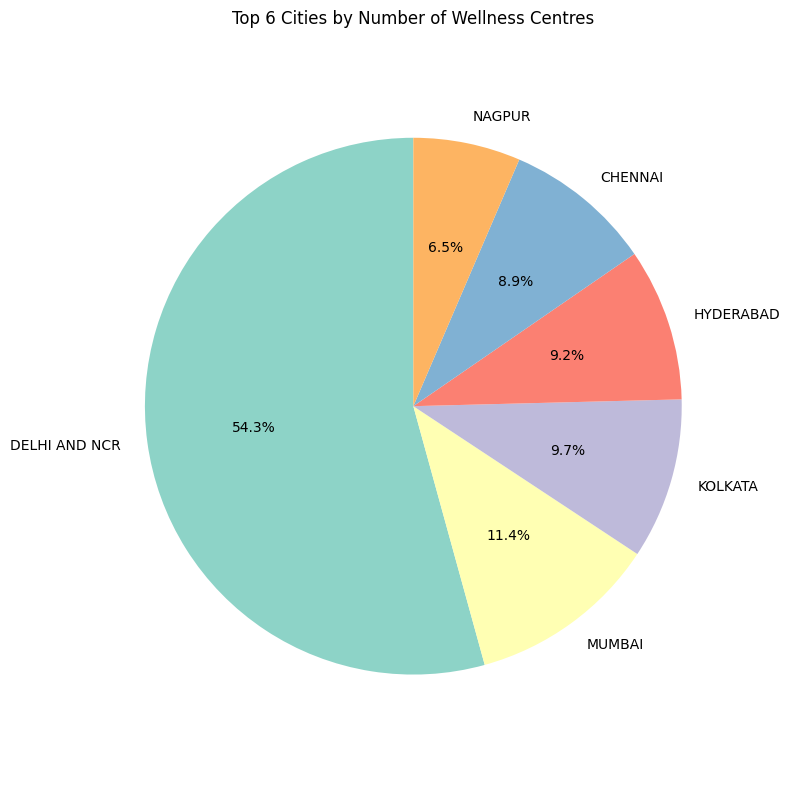

In [33]:
# Count number of wellness centres per city
centre_distribution = df['cityName'].value_counts().nlargest(6)

plt.figure(figsize=(8, 8))
colors = sns.color_palette("Set3")
plt.pie(centre_distribution, labels=centre_distribution.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Top 6 Cities by Number of Wellness Centres")
plt.axis('equal')
plt.tight_layout()
plt.show()

#9. KDE with Log Scale

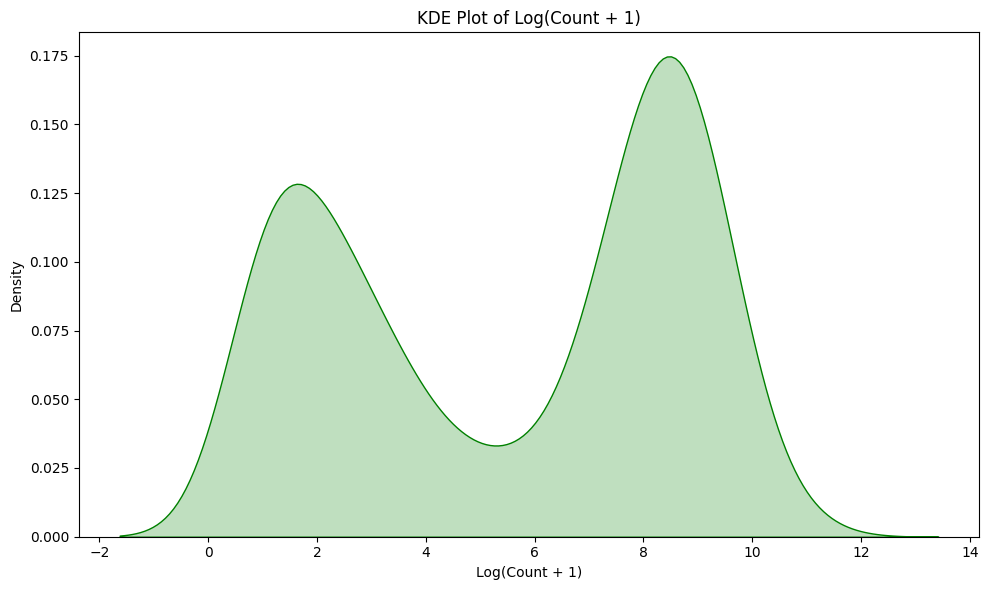

In [36]:
plt.figure(figsize=(10, 6))
sns.kdeplot(np.log1p(df['count']), shade=True, color='green')
plt.title("KDE Plot of Log(Count + 1)")
plt.xlabel("Log(Count + 1)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

#10. Count Plot for card_type

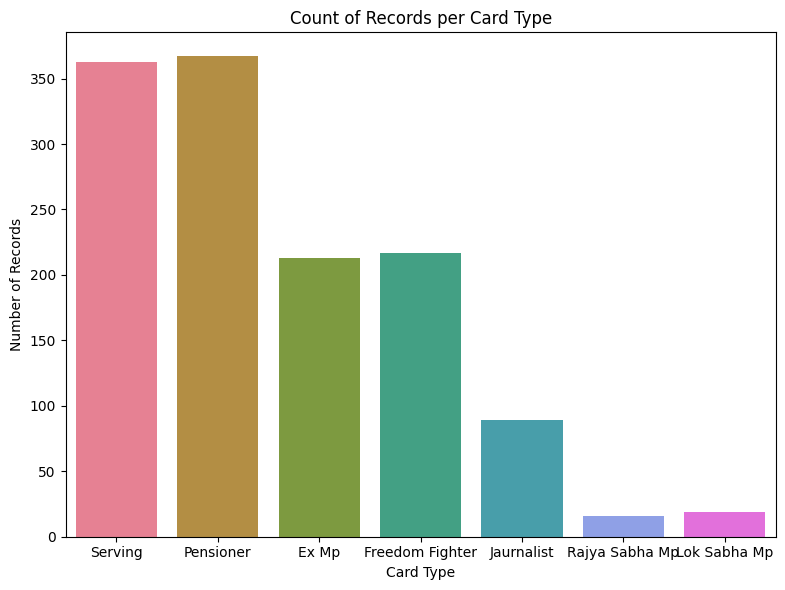

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='card_type', data=df, palette='husl')
plt.title("Count of Records per Card Type")
plt.xlabel("Card Type")
plt.ylabel("Number of Records")
plt.tight_layout()
plt.show()

#Grouped Summary by City & Card Type

In [39]:
grouped = df.groupby(['cityName', 'card_type'])['count'].agg(['sum', 'mean', 'median', 'max', 'min']).reset_index()
grouped.head()

,cityName,card_type,sum,mean,median,max,min
0,AHMEDABAD,Ex Mp,123,17.571429,10.0,61,1
1,AHMEDABAD,Freedom Fighter,37,7.400000,5.0,17,1
2,AHMEDABAD,Pensioner,37233,3723.300000,3779.0,8602,1562
3,AHMEDABAD,Rajya Sabha Mp,5,5.000000,5.0,5,5
4,AHMEDABAD,Serving,67390,6126.363636,5710.0,20681,16


#Top Centre per Card Type

In [40]:
highest_by_type = df.loc[df.groupby('card_type')['count'].idxmax()][['card_type', 'cityName', 'wellnessCentreName', 'count']]
highest_by_type

,card_type,cityName,wellnessCentreName,count
1143,Ex Mp,DELHI AND NCR,North Avenue,1361
165,Freedom Fighter,HYDERABAD,Begumpet,3237
334,Jaurnalist,DELHI AND NCR,Laxmi Nagar,487
1155,Lok Sabha Mp,DELHI AND NCR,Pha (Annexe),1605
67,Pensioner,DELHI AND NCR,Gurugram Sector 5,31321
776,Rajya Sabha Mp,DELHI AND NCR,North Avenue,402
596,Serving,DELHI AND NCR,Yamuna Vihar,66423


 📝 Summary

- The dataset contains 1,284 records with no missing values.
- Most records belong to the *Pensioner* card type.
- *Ahmedabad, **Mumbai, and **Delhi* have the highest usage counts.
- Some wellness centres show significantly higher usage (outliers).
- Count distribution is *right-skewed*, as seen in the KDE plot.
- Visuals like pie chart, scatter plot, and count plot helped reveal key trends.
- Overall, the data gives clear insights into card usage and city-wise distribution.